## 04 - Creación de los modelos de predicción

En este último notebook, construiremos y evaluaremos los modelos de predicción, aplicando todo el trabajo realizado en las fases anteriores de análisis exploratorio y preprocesamiento. El objetivo es abordar dos tareas diferentes utilizando técnicas de aprendizaje automático:

1. **Regresión**: Predecir la nota_final de cada estudiante, usando un modelo de regresión sobre el dataset preparado.

2. **Clasificación**: Predecir si un estudiante aprobará o no (variable binaria aprobado), aplicando modelos de clasificación.

A lo largo de este notebook, se entrenarán varios modelos, se evaluará su rendimiento utilizando métricas adecuadas y se compararán los resultados para seleccionar el modelo más eficaz en cada caso.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/preprocessed_dataset.csv")
df.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,nota_final,aprobado,tiene_tutor_no,tiene_tutor_sí,estilo_aprendizaje_auditivo,estilo_aprendizaje_desconocido,estilo_aprendizaje_kinestésico,estilo_aprendizaje_lectura/escritura,estilo_aprendizaje_visual,horario_estudio_preferido_desconocido,horario_estudio_preferido_mañana,horario_estudio_preferido_noche,horario_estudio_preferido_tarde
0,-0.229884,-1.434220,0.695453,-0.249372,0.422422,0.0,84.4,1,0,1,0,0,0,1,0,0,0,0,1
1,0.200041,0.745231,0.520023,-1.795930,-1.591853,2.0,72.0,1,1,0,0,1,0,0,0,0,0,0,1
2,-1.146769,1.396304,0.034724,0.561561,0.422422,0.0,80.0,1,1,0,0,0,0,1,0,0,1,0,0
3,-0.706248,0.816929,0.487042,1.190730,-0.153085,0.0,78.2,1,1,0,0,0,0,0,1,1,0,0,0
4,-1.870671,-0.247356,-1.069572,-0.252267,-0.728592,1.0,66.0,1,1,0,1,0,0,0,0,1,0,0,0


### **Modelo de Regresión**

Empezaremos con el modelo de regresión, dividiendo el conjunto en entrenamiento y prueba:

In [3]:
tvR = 'nota_final'
tvC = 'aprobado'
X = df.drop(columns=[tvR, tvC])
y = df[tvR]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (800, 17)
Tamaño del conjunto de prueba: (200, 17)


In [5]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression(fit_intercept=True, n_jobs=-1)

modelo.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

Vamos a ver el resultado de forma visual

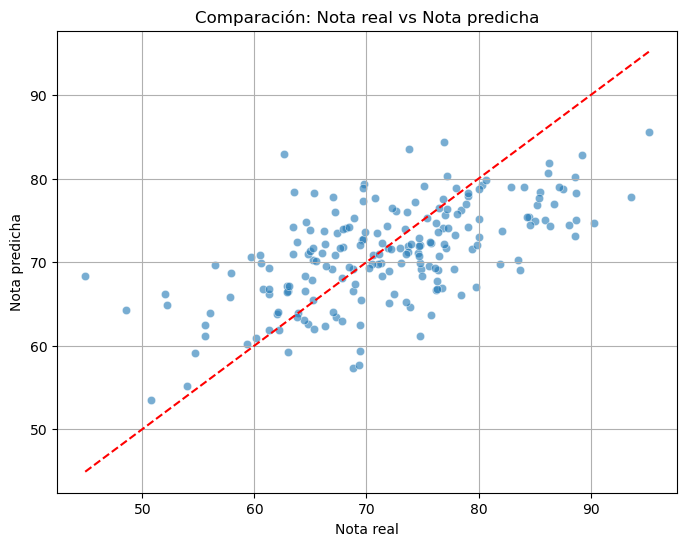

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = modelo.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Nota real")
plt.ylabel("Nota predicha")
plt.title("Comparación: Nota real vs Nota predicha")
plt.grid(True)
plt.show()


Evaluaremos el modelo con métricas para ver su precisión y efectividad:

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2:{r2:.3f}")
print(f"MAE:{mae:.3f}")
print(f"MSE:{mse:.3f}")
print(f"RMSE:{rmse:.3f}")

R2:0.358
MAE:5.819
MSE:52.551
RMSE:7.249


Estas métricas nos dicen lo siguiente: 
- R2: Indica que el modelo explica el 35,8% de la variación en la nota_final. Es decir, mejora en un 35,8% respecto a simplemente predecir siempre la media. Aún hay margen de mejora.
- MAE: Mide el error absoluto medio. En promedio, el modelo se equivoca 5,82 puntos sobre 100 al predecir la nota_final.
- MSE: Es el error cuadrático medio. Penaliza los errores grandes más fuertemente. Un valor alto sugiere que algunos errores son importantes.
- RMSE: Es la raíz cuadrada del MSE. Nos da el error promedio de predicción, también en puntos sobre 100. Penaliza más los errores grandes que el MAE.

En este modelo, nos centraremos principalmente en:

- R², ya que nos indica qué tan bien se ajusta el modelo a los datos.

- RMSE, para tener una estimación realista del error de predicción medio.

Ahora compararemos resultados del set de entrenamiento y prueba para ver si hay overfitting o underfitting:

In [8]:
y_train_pred = modelo.predict(X_train)

# Métricas en entrenamiento
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


# Mostrar resultados
print("Entrenamiento:")
print(f"R2: {r2_train:.3f}, MAE: {mae_train:.3f}, RMSE: {rmse_train:.3f}")
print("\nPrueba:")
print(f"R2: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

Entrenamiento:
R2: 0.392, MAE: 6.029, RMSE: 7.550

Prueba:
R2: 0.358, MAE: 5.819, RMSE: 7.249


Parece que los resultados de entrenamiento y prueba son bastante cercanos, lo que indica que el modelo tiene un desempeño relativamente consistente. Sin embargo, estas métricas aún se pueden mejorar.

Utilizaremos k-fold cross validation para ver si mejora:

In [9]:
from sklearn.model_selection import cross_val_score, KFold

# Configuración de K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluar el modelo usando cross-validation para RMSE
rmse_scores = cross_val_score(modelo, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-rmse_scores)  # Convertir los valores negativos a positivos

# Evaluar el modelo usando cross-validation para R²
r2_scores = cross_val_score(modelo, X, y, cv=kf, scoring='r2')

# Resultados
print(f"RMSE promedio: {rmse_scores.mean()}")

print(f"R² promedio: {r2_scores.mean()}")

RMSE promedio: 7.552945789447671
R² promedio: 0.3609073137653692


El rendimiento general en el conjunto de prueba no cambia significativamente al usar validación cruzada, pero sí refleja una mejor capacidad de generalización al evaluar el modelo en múltiples subconjuntos de los datos.

Aún así, trataremos de mejorar este desempeño explorando variantes de la regresión lineal con regularización, como Ridge, Lasso y Elastic Net, que podrían ayudar a reducir el sobreajuste y mejorar la precisión del modelo al penalizar coeficientes innecesarios. Los utilizaremos junto a Cross Validation:

In [10]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
elasticnet_model = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

models = {
    "Ridge": ridge_model,
    "Lasso": lasso_model,
    "ElasticNet": elasticnet_model
}

for name, model in models.items():
    print(name)
    
    rmse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-rmse_scores)  
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=10)
    
    print(f"RMSE promedio: {np.mean(rmse_scores):.4f}")
    print(f"R² promedio: {np.mean(r2_scores):.4f}")
    print("-" * 40)

Ridge
RMSE promedio: 7.5524
R² promedio: 0.3623
----------------------------------------
Lasso
RMSE promedio: 7.5318
R² promedio: 0.3655
----------------------------------------
ElasticNet
RMSE promedio: 7.5293
R² promedio: 0.3659
----------------------------------------


**Observaciones:**

- ElasticNet y Lasso presentan resultados muy similares, con un RMSE promedio de alrededor de 7.53 y un R² promedio cercano a 0.37.

- Ridge tiene un RMSE promedio de 7.55, ligeramente superior, pero un R² promedio de 0.36, algo más bajo que los otros dos.

- Comparado con una regresión lineal normal (sin regularización), los modelos Ridge, Lasso y ElasticNet ofrecen un mejor ajuste, al reducir el sobreajuste y mejorar la generalización, lo que podría indicar que la regularización es útil para este caso específico.

Para tratar de mejorar el desempeño aún más, probaremos Random Forest, ya que este modelo no depende de suposiciones lineales y podría capturar relaciones más complejas en los datos.

Aquí atmbién utilizaremos CV para mitigar el overfitting:

In [11]:
from sklearn.ensemble import RandomForestRegressor

RFmodel = RandomForestRegressor(random_state=42)


rmse_scores = cross_val_score(RFmodel, X, y, cv = kf, scoring="neg_mean_squared_error")
rsme_scores = np.sqrt(-rmse_scores)

r2_scores = cross_val_score(RFmodel, X, y, cv=kf, scoring="r2")

print(f"RMSE promedio: {np.mean(rsme_scores):.4f} ± {np.std(rsme_scores):.4f}")
print(f"R² promedio: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

RMSE promedio: 7.7630 ± 0.6455
R² promedio: 0.3234 ± 0.0936


Los modelos de regresión lineales como Ridge, Lasso y ElasticNet han mostrado un rendimiento similar, con RMSE y R² ligeramente mejores en comparación con Random Forest. Aunque Random Forest tiene un buen desempeño, especialmente en términos de R², los modelos lineales parecen más adecuados para este conjunto de datos. La diferencia no es muy grande, por lo que Ridge, Lasso y ElasticNet ofrecen una solución eficiente. 

Como última opción en la exploración de modelos, probaremos **XGBoost**, un algoritmo de boosting que es muy eficiente y capaz de manejar relaciones complejas en los datos. Dado que hemos probado varios modelos sin utilizar una optimización avanzada, XGBoost podría ofrecer una mejora significativa en el rendimiento. Posteriormente, una vez tengamos el mejor modelo, utilizaremos **GridSearch** para optimizar los hiperparámetros y así maximizar el desempeño del modelo seleccionado.

In [12]:
from xgboost import XGBRegressor

xgboost_model = XGBRegressor(objective ='reg:squarederror', n_estimators=100)

rmse_scores = cross_val_score(xgboost_model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-rmse_scores) 

r2_scores = cross_val_score(xgboost_model, X, y, cv=kf, scoring='r2')

print(f"RMSE promedio: {np.mean(rmse_scores):.4f}")
print(f"R² promedio: {np.mean(r2_scores):.4f}")

RMSE promedio: 8.5082
R² promedio: 0.1903


Vamos a comprar todos los resultados gráficamente:

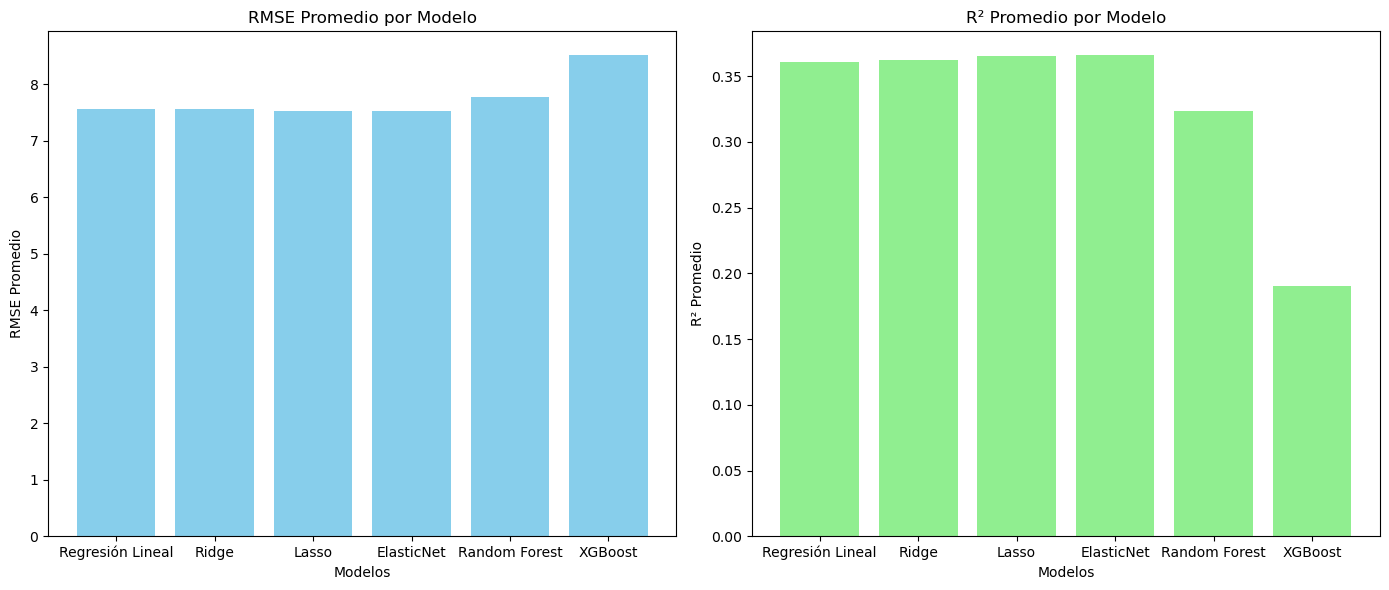

In [13]:
models = ['Regresión Lineal', 'Ridge', 'Lasso', 'ElasticNet', 'Random Forest', 'XGBoost']
rmse_scores = [7.5529, 7.5524, 7.5318, 7.5293, 7.7630, 8.5082]  
r2_scores = [0.3609, 0.3623, 0.3655, 0.3659, 0.3234, 0.1903]  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graficar RMSE
ax1.bar(models, rmse_scores, color='skyblue')
ax1.set_title('RMSE Promedio por Modelo')
ax1.set_xlabel('Modelos')
ax1.set_ylabel('RMSE Promedio')

# Graficar R²
ax2.bar(models, r2_scores, color='lightgreen')
ax2.set_title('R² Promedio por Modelo')
ax2.set_xlabel('Modelos')
ax2.set_ylabel('R² Promedio')

plt.tight_layout()
plt.show()


**Observaciones:**

En los gráficos comparativos, los modelos de regularización (Ridge, Lasso y ElasticNet) han demostrado ser los más efectivos, logrando el mejor equilibrio entre error y capacidad explicativa. Por el contrario, Random Forest y XGBoost han ofrecido un rendimiento inferior, a pesar de ser modelos más potentes. Sin embargo, debido a su alto potencial de mejora mediante ajuste de hiperparámetros, utilizaremos GridSearch con ambos para intentar extraer su máximo rendimiento.

Probaremos primero con random Forest:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Cuadrícula de hiperparámetros con los 3 que más importancia tienen
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['sqrt', 'log2', 0.5],
    'max_depth': [None, 5, 10, 15, 20]
}

grid_search = GridSearchCV(
    estimator=RFmodel,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error', 
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Entrenar con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
print(f"Mejor puntuación (RMSE): {abs(grid_search.best_score_):.4f}")


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Mejores hiperparámetros: {'max_depth': 20, 'max_features': 0.5, 'n_estimators': 400}
Mejor puntuación (RMSE): 7.7223


A pesar de los mejores hiperparámetros encontrados, el rendimiento del modelo sigue siendo moderado. Esto podría indicar que Random Forest no es el modelo óptimo para este conjunto de datos

Probaremos a afinar el modelo xgboost para ver si encontramos mejoras:

In [ ]:

# Definir la cuadrícula de hiperparámetros con los 5 con más importancia
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  
    'gamma': [0, 0.1, 0.2],  
    'lambda': [0, 0.5, 1],  
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 5, 7] 
}

grid_search = GridSearchCV(
    estimator=xgboost_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Entrenar con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
print(f"Mejor puntuación (RMSE): {np.sqrt(-grid_search.best_score_):.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores hiperparámetros: {'colsample_bytree': 0.6, 'gamma': 0, 'lambda': 0, 'learning_rate': 0.05, 'max_depth': 3}
Mejor puntuación (RMSE): 7.7124


A pesar de la notable mejora respecto al modelo de xgboost sin afinación de hiperparámetros, no mejora repescto al resto de modelos, por lo que lo descartaremos.

El mejor modelo hasta ahora ha sido ElasticNet, como último intento de mejora, trataremos de utilizar Gridsearch para encontrar la mejor combinación de hiperparámetros, que en este caso solo tiene 2:

In [ ]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 20],  
    'l1_ratio': [0.1, 0.5, 0.7, 0.9] 
}

grid_search = GridSearchCV(
    estimator=elasticnet_model,
    param_grid=param_grid,
    scoring='r2', 
    cv=5, 
    n_jobs=-1, 
    verbose=1
)

# Entrenar con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

best_r2 = grid_search.best_score_
print(f"Mejor puntuación (R²) en validación cruzada: {best_r2:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Mejores hiperparámetros: {'alpha': 0.1, 'l1_ratio': 0.7}
Mejor puntuación (R²) en validación cruzada: 0.3688


In [ ]:
# Reentrenar con todos los datos, ya que hay mejora y queremos llevar el modelo a  producción
best_model.fit(X, y)

**Observaciones:**:

Podemos ver que ha escogido el mismo alpha que antes pero el l1_ratio ha cambiado, haciendo una ligera mejora en el modelo

### **Conclusión final modelo regresión:**

El modelo seleccionado ha sido ElasticNet, que ha demostrado un rendimiento razonable con un R² de 0.3688. El R² indica que aproximadamente el 37% de la variabilidad en los datos es explicada por el modelo. Esto sugiere que, aunque el modelo no es altamente predictivo, captura ciertas relaciones entre las variables. 

Se utilizaron los hiperparámetros alpha = 0.1 y l1_ratio = 0.7, lo que implica una regularización moderada, favoreciendo más la regularización L1 (tipo Lasso). Aunque los resultados pueden mejorar, ElasticNet ofrece un buen equilibrio entre simplicidad y rendimiento para este problema.

Para finalizar, guardaremos el modelo para un futuro uso:

In [17]:
import joblib

joblib.dump(best_model, '../models/regression_model.pkl')


['../models/regression_model.pkl']

¡Listo! 

Con esto podemos pasar al modelo de clasificación:

### **Modelo Clasificación**

En este caso, estamos trabajando con un modelo cuyo objetivo es predecir si un estudiante ha aprobado o no.

 Antes de continuar, es crucial asegurarnos de que los datos estén balanceados. Esto es importante porque un desbalance significativo en las clases podría generar sesgos en el modelo,favoreciendo la clase mayoritaria. En nuestro caso, el porcentaje de estudiantes aprobados representa un 90%, lo que indica un desbalance considerable que debemos corregir antes de proceder con el entrenamiento del modelo.

In [18]:
y = df[tvC]

values = y.value_counts()
print(values)

class_percentages = y.value_counts(normalize=True) * 100
print(class_percentages)

aprobado
1    898
0    102
Name: count, dtype: int64
aprobado
1    89.8
0    10.2
Name: proportion, dtype: float64


Para abordar el desbalanceo de clases, ajustaremos el peso de las clases en los modelos que utilizemos. 

Estos modelos serán:
- Regresión Logística
- Ridge, Lasso y ElastixNet
- Random Forest
- XGBoost

Y utilizaremosel parámetro ``class_weight='balanced'`` o ``scale_pos_weight`` para dar mayor importancia a la clase minoritaria. 

Estos modelos serán evaluados con la matriz de confusión y además guardaremos los resultados en una lista para ver una comparación de estos:

In [19]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced"),
    "Ridge": RidgeClassifier(class_weight="balanced"),
    "Lasso": LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced'),
    "ElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, class_weight='balanced'),
    "RandomForestClassifier": RandomForestClassifier(class_weight="balanced"),
    "XGBClassifier": XGBClassifier(scale_pos_weight=8.8)  # 898/102 (aprobados/noaprobados)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Logistic Regression
Accuracy: 0.7475
Precision: 0.9591
Recall: 0.7507
F1 Score: 0.8422

Evaluación en el conjunto de prueba:
Accuracy: 0.7100
Precision: 0.9485
Recall: 0.7167
F1 Score: 0.8165


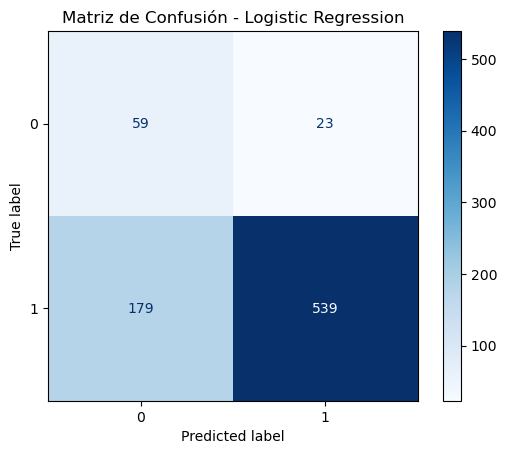


Ridge
Accuracy: 0.7375
Precision: 0.9568
Recall: 0.7409
F1 Score: 0.8352

Evaluación en el conjunto de prueba:
Accuracy: 0.7000
Precision: 0.9478
Recall: 0.7056
F1 Score: 0.8089


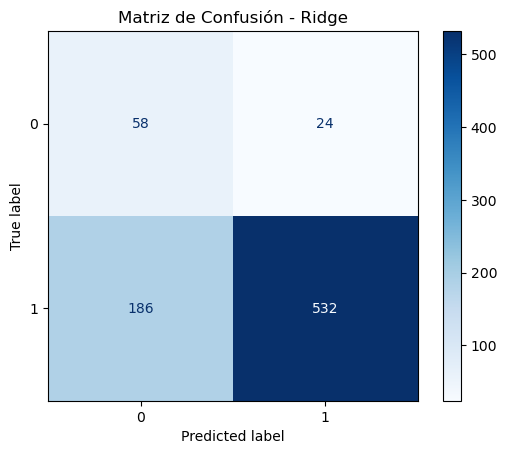


Lasso
Accuracy: 0.7412
Precision: 0.9571
Recall: 0.7451
F1 Score: 0.8379

Evaluación en el conjunto de prueba:
Accuracy: 0.7050
Precision: 0.9481
Recall: 0.7111
F1 Score: 0.8127


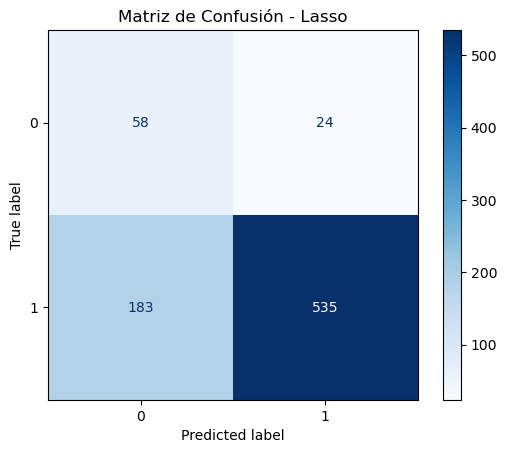

c:\Users\sergi\anaconda3\envs\xgbprueba\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sergi\anaconda3\envs\xgbprueba\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sergi\anaconda3\envs\xgbprueba\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sergi\anaconda3\envs\xgbprueba\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sergi\anaconda3\envs\xgbprueba\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



ElasticNet
Accuracy: 0.7450
Precision: 0.9573
Recall: 0.7493
F1 Score: 0.8406

Evaluación en el conjunto de prueba:
Accuracy: 0.7200
Precision: 0.9493
Recall: 0.7278
F1 Score: 0.8239


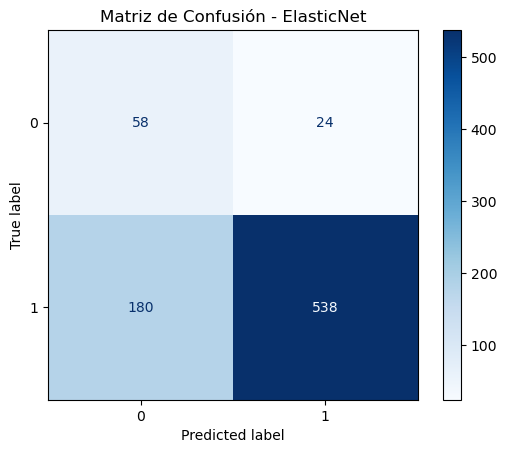


RandomForestClassifier
Accuracy: 0.8938
Precision: 0.8991
Recall: 0.9930
F1 Score: 0.9437

Evaluación en el conjunto de prueba:
Accuracy: 0.8950
Precision: 0.8995
Recall: 0.9944
F1 Score: 0.9446


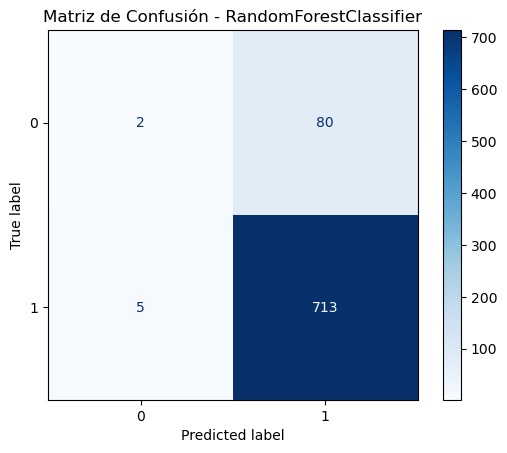


XGBClassifier
Accuracy: 0.8888
Precision: 0.9079
Recall: 0.9749
F1 Score: 0.9402

Evaluación en el conjunto de prueba:
Accuracy: 0.8950
Precision: 0.9077
Recall: 0.9833
F1 Score: 0.9440


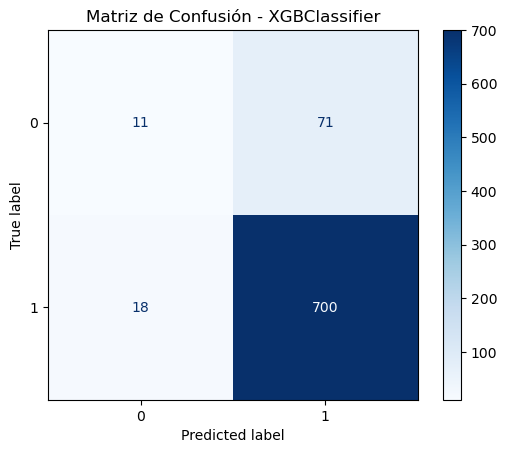

In [20]:
results = [] #Lista para guardar y comprar resultados

for name, model in models.items():
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)
    
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    print(f"\n{name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
    })

    # Evaluar el modelo en el conjunto de prueba
    model.fit(X_train, y_train) 
    y_test_pred = model.predict(X_test)  

    print("\nEvaluación en el conjunto de prueba:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")

    cm = confusion_matrix(y_train, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

Podemos observar que lso modelos generalizan batsante bien, ahora vamos a ver en un gráfico la comparación de estos modelos:

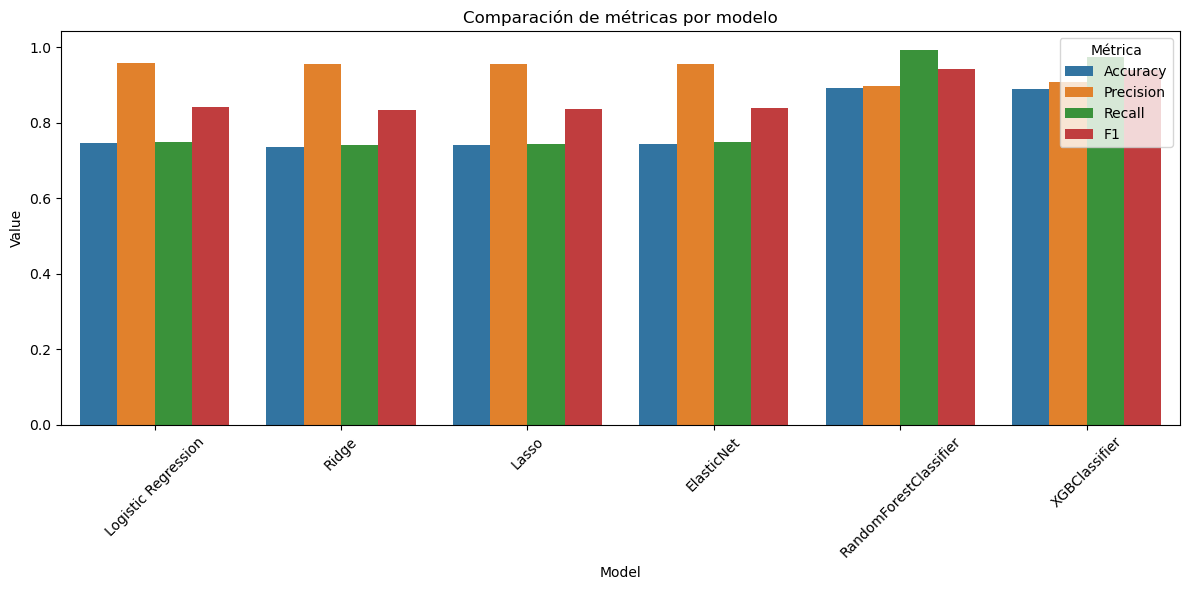

In [21]:
df_results = pd.DataFrame(results)

df_melted = df_results.melt(
    id_vars='Model',
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
    var_name='Metric',
    value_name='Value'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Value', hue='Metric', errorbar=None)
plt.title('Comparación de métricas por modelo')
plt.legend(title='Métrica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En nuestro caso, el signfiicado de las métricas son:

- **Accuracy:** El porcentaje de predicciones correctas de todo el conjunto de datos

- **Precision:** Mide qué tan precisas son las predicciones positivas del modelo. Es decir, de todas las veces que el modelo predijo una clase positiva, ¿cuántas realmente fueron correctas?

- **Recall:** Mide qué tan bien el modelo identifica todas las instancias positivas reales. Es decir, de todas las instancias que son realmente positivas, ¿cuántas fueron correctamente identificadas por el modelo?

- **F1:** Es una métrica combinada que tiene en cuenta tanto la precisión como el recall. El F1 Score da un valor único que balancea ambos, y es útil cuando hay un desbalance entre precisión y recall.

### **Observaciones:**

- Modelos lineales (Logistic Regression, Ridge, Lasso, ElasticNet): Los modelos lineales muestran un rendimiento bastante similar, con Logistic Regression destacándose ligeramente en términos de precisión (precision) y puntuaciones de F1 en ambos conjuntos (entrenamiento y prueba). Sin embargo, su capacidad de recall (detectar verdaderos positivos) en el conjunto de prueba es un poco más baja en comparación con los demás modelos.

- RandomForestClassifier tiene el mejor rendimiento en cuanto a accuracy (0.9000), seguido de cerca por XGBClassifier (0.8950). Además, RandomForest muestra un recall muy alto (0.9944 en el conjunto de prueba), lo que sugiere que es muy eficaz para identificar correctamente las clases positivas.

- XGBClassifier también muestra un buen desempeño, con una accuracy de 0.8950 y un recall de 0.9833, lo que lo hace muy eficiente para clasificar correctamente las instancias positivas, aunque con un pequeño margen por debajo del RandomForest.


A pesar de que tenemos unas métricas excelentes, apliciremos Gridseacrh para afinar el modelo de Random Forest, ya que ha sido el mejor, con esto buscaremos una mejora aunque sea pequeña.

Utilizaremos la métrica F1 score, ya que equilibra precisión y recall:

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


Mejores parámetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mejor puntuación de CV (accuracy): 0.945599796099976

Evaluación en el conjunto de prueba:
Accuracy: 0.8950
Precision: 0.9206
Recall: 0.9667
F1 Score: 0.9431


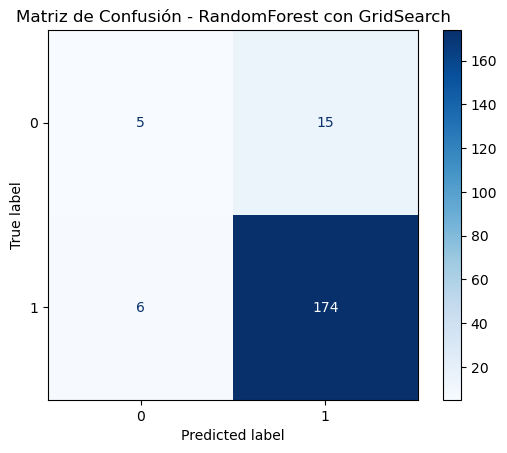

In [22]:
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [None, 5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'max_features': [None, 'sqrt', 'log2'], 
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1', verbose = True)

grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación de CV (accuracy):", grid_search.best_score_)

classmodel = grid_search.best_estimator_

y_test_pred = grid_search.best_estimator_.predict(X_test)
print("\nEvaluación en el conjunto de prueba:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - RandomForest con GridSearch")
plt.show()


### **Resultados y Conclusión**

| Métrica              | Modelo Anterior (RandomForest) | Modelo con GridSearchCV     |
|----------------------|-------------------------------|-----------------------------|
| **Accuracy**         | 0.8900                        | 0.8950                      |
| **Precision**        | 0.8990                        | 0.9206                      |
| **Recall**           | 0.9889                        | 0.9667                      |
| **F1 Score**         | 0.9418                        | 0.9431                      |

En este caso, las métricas más relevantes son Accuracy y F1 Score, ya que reflejan el desempeño general y el equilibrio entre precisión y recall. Observamos una ligera mejora en ambas métricas con el modelo optimizado mediante GridSearchCV, por lo que seleccionaremos este modelo de Random Forest como el de mejor rendimiento.

Procederemos a hacer el entrenamiento final y guardar este modelo en un archivo Pickle, al igual que hicimos con el modelo de regresión, para su uso futuro.

In [ ]:
classmodel.fit(X, y)

In [23]:
joblib.dump(classmodel, '../models/classification_model.pkl')

['../models/classification_model.pkl']

Con esto, hemos finalizado el proceso de creación de dos modelos de Machine Learning para predecir las notas de los estudiantes y determinar si aprobarán o no. Ambos modelos han sido evaluados y optimizados para asegurar su rendimiento, y ahora están disponibles para ser utilizados en el futuro según sea necesario.